<a href="https://colab.research.google.com/github/navidyamini/TensorFlow2.0_Codes/blob/main/code/TF2_0_RNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # RNN for Image Classification  dataset MNIST

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11490434/11490434 [==============================] - 1s 0us/step
x_train.shape: (60000, 28, 28)


In [4]:
# build the model
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [5]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 26s 8ms/step - loss: 0.3454 - accuracy: 0.8879 - val_loss: 0.1146 - val_accuracy: 0.9641
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1040 - accuracy: 0.9693 - val_loss: 0.0818 - val_accuracy: 0.9758
Epoch 3/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0709 - accuracy: 0.9786 - val_loss: 0.0648 - val_accuracy: 0.9801
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0570 - accuracy: 0.9830 - val_loss: 0.0640 - val_accuracy: 0.9812
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0556 - val_accuracy: 0.9828
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0372 - accuracy: 0.9882 - val_loss: 0.0539 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0326 - accuracy: 0.9899 - val_loss: 0.0441 - val_ac

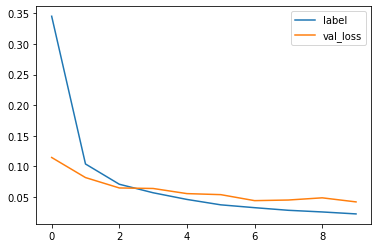

In [7]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='label')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

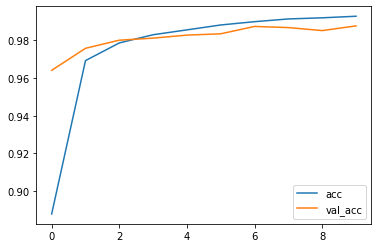

In [8]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 2ms/step
Confusion matrix, without normalization
[[ 970    0    2    0    0    0    6    1    1    0]
 [   0 1128    1    0    0    1    2    3    0    0]
 [   0    0 1030    0    0    0    0    2    0    0]
 [   0    0    7  998    0    1    0    2    2    0]
 [   0    1    1    0  968    0    3    2    1    6]
 [   0    0    2   13    0  868    2    0    4    3]
 [   1    2    0    0    0    3  951    0    1    0]
 [   0    4   12    1    0    0    0 1011    0    0]
 [   0    1    3    2    0    3    0    2  962    1]
 [   0    0    0    2    3    0    1    6    6  991]]


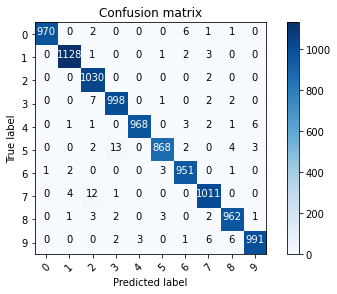

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.


Text(0.5, 1.0, 'True label: 8 Predicted 2')

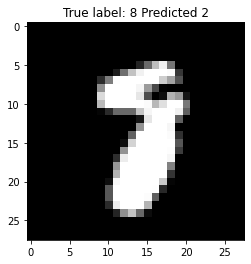

In [12]:
# Show some misclassified examples
misclassified_idx = np.where(p_test !=y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted %s" % (y_test[i], p_test[i]))